In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [8]:
!ls

README.md                         nasdaq_screener_1685729611962.csv
nasdaq_screener_1685729316139.csv nasdaq_screener_1685729644309.csv
nasdaq_screener_1685729362138.csv nasdaq_screener_1685729666989.csv
nasdaq_screener_1685729424243.csv nasdaq_screener_1685729708105.csv
nasdaq_screener_1685729454561.csv nasdaq_screener_1685729730816.csv
nasdaq_screener_1685729483889.csv notebook.ipynb
nasdaq_screener_1685729579410.csv


In [15]:
csvs = ['nasdaq_screener_1685729611962.csv','nasdaq_screener_1685729316139.csv', 'nasdaq_screener_1685729644309.csv',
'nasdaq_screener_1685729362138.csv', 'nasdaq_screener_1685729666989.csv', 'nasdaq_screener_1685729424243.csv', 'nasdaq_screener_1685729708105.csv',
'nasdaq_screener_1685729454561.csv', 'nasdaq_screener_1685729730816.csv',
'nasdaq_screener_1685729483889.csv',
'nasdaq_screener_1685729579410.csv']

sector_to_symbol_dict = {}

for csv in csvs:
    df = pd.read_csv(csv)
    for idx, row in df.iterrows():
        sector = row['Sector']
        sym = row['Symbol']
        
        if sector in sector_to_symbol_dict.keys():
            sector_to_symbol_dict[sector].append(sym)
        else:
            sector_to_symbol_dict[sector] = [sym]
        

In [17]:
sector_to_etf_dict = {}
sector_to_etf_dict['Technology'] = 'XLK'
sector_to_etf_dict['Healthcare'] = 'XLV'
sector_to_etf_dict['Energy'] = 'XLE'
sector_to_etf_dict['Financials'] = 'XLF'
sector_to_etf_dict['Consumer Staples'] = 'XLP'
sector_to_etf_dict['Utilities'] = 'XLU'
sector_to_etf_dict['Consumer Discretionary'] = 'XLY'
sector_to_etf_dict['Basic Materials'] = 'XLB'
sector_to_etf_dict['Industrials'] = 'VIS'
sector_to_etf_dict['Telecommunications'] = 'VOX'
sector_to_etf_dict['Real Estate'] = 'XLRE'

In [18]:
sectors = sector_to_etf_dict.keys()
for s in sectors:
    etf_sect = sector_to_etf_dict[s]
    print(etf_sect, yf.Ticker(etf_sect).history(period='max').index[0], sep=' first day of data: ')

XLK first day of data: 1998-12-22 00:00:00-05:00
XLV first day of data: 1998-12-22 00:00:00-05:00
XLE first day of data: 1998-12-22 00:00:00-05:00
XLF first day of data: 1998-12-22 00:00:00-05:00
XLP first day of data: 1998-12-22 00:00:00-05:00
XLU first day of data: 1998-12-22 00:00:00-05:00
XLY first day of data: 1998-12-22 00:00:00-05:00
XLB first day of data: 1998-12-22 00:00:00-05:00
VIS first day of data: 2004-09-29 00:00:00-04:00
VOX first day of data: 2004-09-29 00:00:00-04:00
XLRE first day of data: 2015-10-08 00:00:00-04:00


# Let's look at Energy sector

In [19]:
#energy etf: XLE
xle = yf.Ticker('XLE').history(period='max')
xle.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1998-12-22 00:00:00-05:00,12.675963,12.718443,12.607996,12.650476,15200,0.0,0.0,0.0
1998-12-23 00:00:00-05:00,12.692955,12.913850,12.675963,12.913850,67800,0.0,0.0,0.0
1998-12-24 00:00:00-05:00,12.947828,12.947828,12.828885,12.845877,12300,0.0,0.0,0.0
1998-12-28 00:00:00-05:00,12.913851,12.913851,12.692956,12.777916,13500,0.0,0.0,0.0
1998-12-29 00:00:00-05:00,12.811896,12.905352,12.692953,12.905352,22000,0.0,0.0,0.0


In [20]:
index = xle.index
months = []
years = []
days = []
for dt in index:
    months.append(dt.month)
    years.append(dt.year)
    days.append(dt.day)

xle['Month'] = pd.Series(months, index=index)
xle['Year'] = pd.Series(years, index=index)
xle['Day'] = pd.Series(days, index=index)
xle.reset_index(drop=True,inplace=True)

Sample 10 companies from the Energy sector

In [21]:
energy_equities = sector_to_symbol_dict['Energy']

In [22]:
import random
random.shuffle(energy_equities)
energy_equities = energy_equities[:10]
print(energy_equities) #['EGY', 'TUSK', 'CHK', 'KNTK', 'DKL', 'WWD', 'RES', 'PAA', 'VIVK', 'RNGR'] 

['EGY', 'TUSK', 'CHK', 'KNTK', 'DKL', 'WWD', 'RES', 'PAA', 'VIVK', 'RNGR']


In [42]:
energy_equities_dfs = {}

for s in energy_equities:
    fd = yf.Ticker(s).history(period='max').index[0]
    if pd.Timestamp(year=fd.year,month=fd.month,day=fd.day) > pd.Timestamp(year=1998, month=12, day=22):
        energy_equities_dfs[s] = yf.Ticker(s).history(period='max')
    else:
        energy_equities_dfs[s] = yf.Ticker(s).history(start='1998-12-22')

In [25]:
energy_equities_dfs['EGY']

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-12-22 00:00:00-05:00,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0
1998-12-23 00:00:00-05:00,1.005193,1.064823,1.005193,1.005193,14000,0.0,0.0
1998-12-24 00:00:00-05:00,0.768566,0.768566,0.768566,0.768566,30000,0.0,0.0
1998-12-28 00:00:00-05:00,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0
1998-12-29 00:00:00-05:00,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-26 00:00:00-04:00,3.940000,3.970000,3.880000,3.940000,759600,0.0,0.0
2023-05-30 00:00:00-04:00,3.850000,3.895000,3.770000,3.880000,1079700,0.0,0.0
2023-05-31 00:00:00-04:00,3.810000,3.900000,3.790000,3.860000,2027000,0.0,0.0


In [43]:
for s in energy_equities:
    
    df = energy_equities_dfs[s]
    index = df.index
    days = []
    months = []
    years = []
    
    for dt in index:
        days.append(dt.day)
        months.append(dt.month)
        years.append(dt.year)
    
    df['Month'] = pd.Series(months, index=index)
    df['Year'] = pd.Series(years, index=index)
    df['Day'] = pd.Series(days, index=index)
    
    df.reset_index(drop=True, inplace=True)
    
    #compute daily returns where the daily return of day t is simply (close(t)-close(t-1))/close(t-1) 
    daily_rets = []
    for idx, row in df.iterrows():
        if idx == 0:
            daily_rets.append(-1)
            continue
        
        cur_close = row['Close']
        yd_close = df.iloc[idx-1,:]['Close']
        daily_rets.append((cur_close-yd_close)/yd_close)
    
    df['Daily Returns'] = pd.Series(daily_rets)
    

In [44]:
energy_equities_dfs['EGY']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Month,Year,Day,Daily Returns
0,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0,12,1998,22,-1.000000
1,1.005193,1.064823,1.005193,1.005193,14000,0.0,0.0,12,1998,23,0.307882
2,0.768566,0.768566,0.768566,0.768566,30000,0.0,0.0,12,1998,24,-0.235405
3,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0,12,1998,28,0.000000
4,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0,12,1998,29,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6146,3.940000,3.970000,3.880000,3.940000,759600,0.0,0.0,5,2023,26,0.005102
6147,3.850000,3.895000,3.770000,3.880000,1079700,0.0,0.0,5,2023,30,-0.015228
6148,3.810000,3.900000,3.790000,3.860000,2027000,0.0,0.0,5,2023,31,-0.005155
6149,3.870000,3.990000,3.813000,3.930000,862100,0.0,0.0,6,2023,1,0.018135


In [45]:
xle

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Month,Year,Day
0,12.675963,12.718443,12.607996,12.650476,15200,0.0,0.0,0.0,12,1998,22
1,12.692955,12.913850,12.675963,12.913850,67800,0.0,0.0,0.0,12,1998,23
2,12.947828,12.947828,12.828885,12.845877,12300,0.0,0.0,0.0,12,1998,24
3,12.913851,12.913851,12.692956,12.777916,13500,0.0,0.0,0.0,12,1998,28
4,12.811896,12.905352,12.692953,12.905352,22000,0.0,0.0,0.0,12,1998,29
...,...,...,...,...,...,...,...,...,...,...,...
6146,79.559998,79.779999,78.360001,78.769997,14392900,0.0,0.0,0.0,5,2023,26
6147,77.400002,78.050003,77.099998,77.959999,20165800,0.0,0.0,0.0,5,2023,30
6148,76.739998,77.330002,76.330002,76.589996,22398800,0.0,0.0,0.0,5,2023,31
6149,76.769997,78.410004,76.250000,77.540001,25809300,0.0,0.0,0.0,6,2023,1


Compute daily returns for the Energy ETF the same way you did for each of the individual equities 

In [47]:
daily_rets = []
for idx, row in xle.iterrows():
    if idx == 0:
        daily_rets.append(-1)
        continue
    
    cur_close = row['Close']
    yd_close = xle.iloc[idx-1,:]['Close']
    daily_rets.append((cur_close-yd_close)/yd_close)

xle['Daily Returns'] = pd.Series(daily_rets)
xle.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Month,Year,Day,Daily Returns
0,12.675963,12.718443,12.607996,12.650476,15200,0.0,0.0,0.0,12,1998,22,-1.000000
1,12.692955,12.913850,12.675963,12.913850,67800,0.0,0.0,0.0,12,1998,23,0.020819
2,12.947828,12.947828,12.828885,12.845877,12300,0.0,0.0,0.0,12,1998,24,-0.005264
3,12.913851,12.913851,12.692956,12.777916,13500,0.0,0.0,0.0,12,1998,28,-0.005290
4,12.811896,12.905352,12.692953,12.905352,22000,0.0,0.0,0.0,12,1998,29,0.009973


In [48]:
for s in energy_equities:
    df = energy_equities_dfs[s]
    energy_equities_dfs[s] = df.merge(right=xle,how='inner',on=['Year','Month','Day'], suffixes=[None,' ETF'])

In [49]:
energy_equities_dfs['EGY']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Month,Year,Day,Daily Returns,Open ETF,High ETF,Low ETF,Close ETF,Volume ETF,Dividends ETF,Stock Splits ETF,Capital Gains,Daily Returns ETF
0,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0,12,1998,22,-1.000000,12.675963,12.718443,12.607996,12.650476,15200,0.0,0.0,0.0,-1.000000
1,1.005193,1.064823,1.005193,1.005193,14000,0.0,0.0,12,1998,23,0.307882,12.692955,12.913850,12.675963,12.913850,67800,0.0,0.0,0.0,0.020819
2,0.768566,0.768566,0.768566,0.768566,30000,0.0,0.0,12,1998,24,-0.235405,12.947828,12.947828,12.828885,12.845877,12300,0.0,0.0,0.0,-0.005264
3,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0,12,1998,28,0.000000,12.913851,12.913851,12.692956,12.777916,13500,0.0,0.0,0.0,-0.005290
4,0.768566,0.768566,0.768566,0.768566,0,0.0,0.0,12,1998,29,0.000000,12.811896,12.905352,12.692953,12.905352,22000,0.0,0.0,0.0,0.009973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,3.940000,3.970000,3.880000,3.940000,759600,0.0,0.0,5,2023,26,0.005102,79.559998,79.779999,78.360001,78.769997,14392900,0.0,0.0,0.0,-0.003920
6147,3.850000,3.895000,3.770000,3.880000,1079700,0.0,0.0,5,2023,30,-0.015228,77.400002,78.050003,77.099998,77.959999,20165800,0.0,0.0,0.0,-0.010283
6148,3.810000,3.900000,3.790000,3.860000,2027000,0.0,0.0,5,2023,31,-0.005155,76.739998,77.330002,76.330002,76.589996,22398800,0.0,0.0,0.0,-0.017573
6149,3.870000,3.990000,3.813000,3.930000,862100,0.0,0.0,6,2023,1,0.018135,76.769997,78.410004,76.250000,77.540001,25809300,0.0,0.0,0.0,0.012404


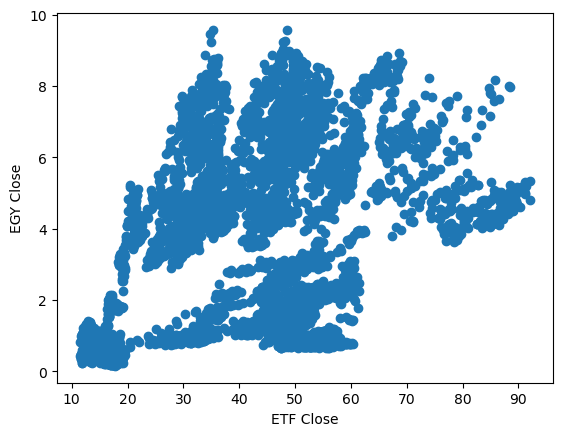

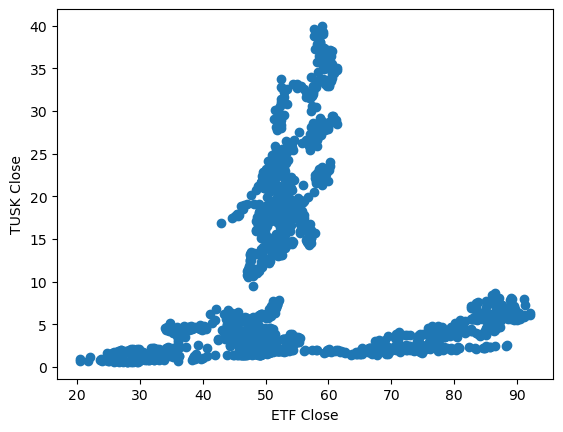

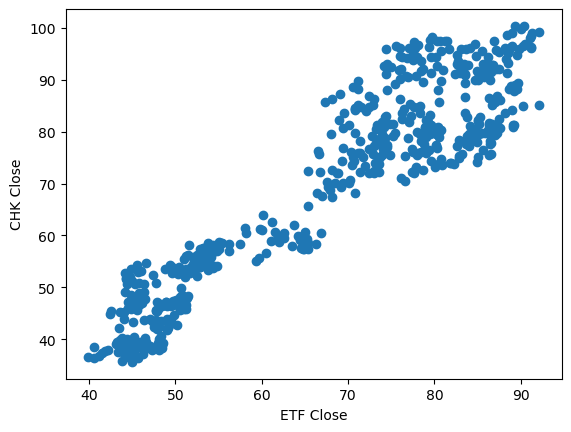

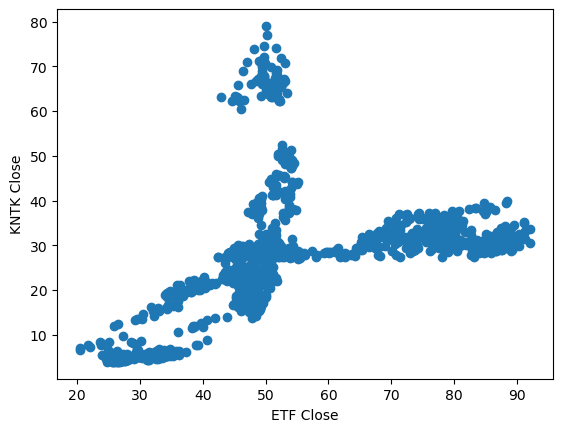

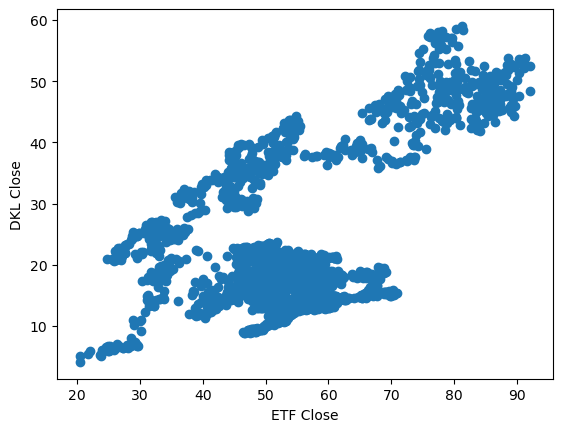

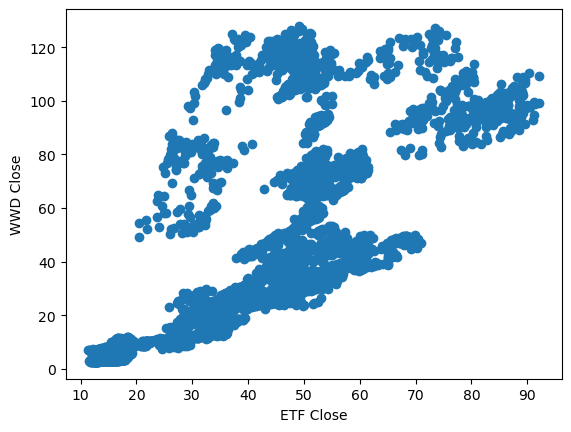

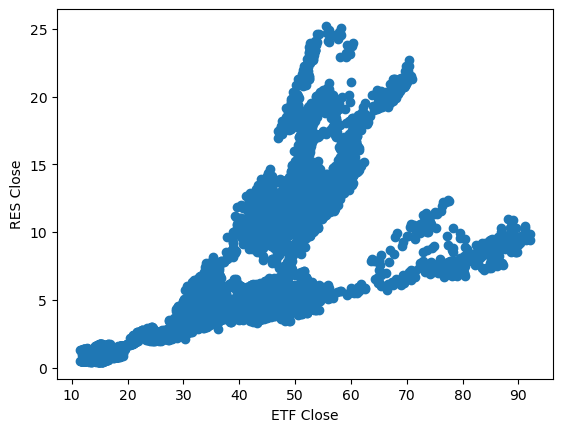

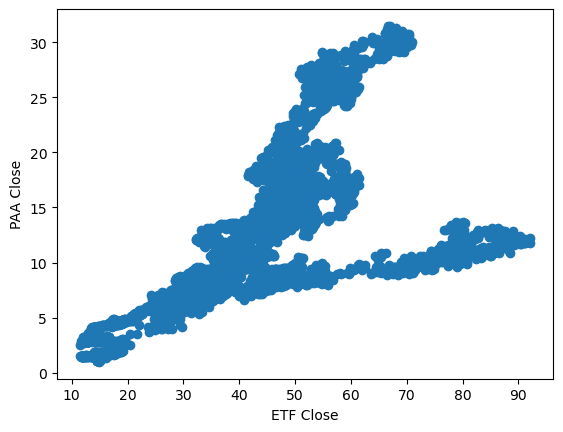

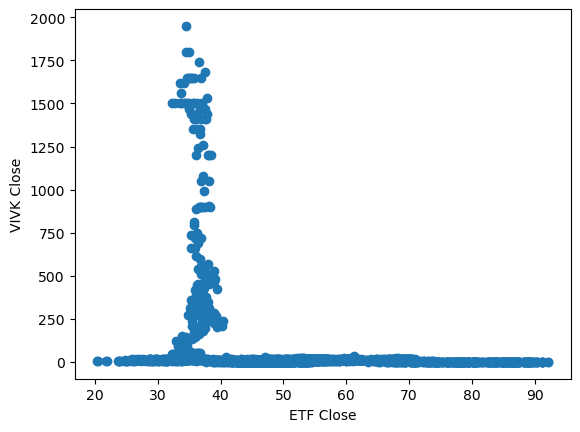

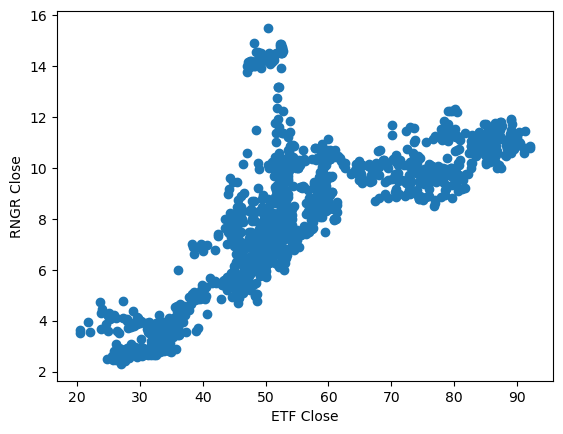

In [78]:
for s in energy_equities:
    df = energy_equities_dfs[s]
    stock_closes = df['Close']
    etf_closes = df['Close ETF']
    plt.figure()
    plt.scatter(etf_closes, stock_closes)
    plt.xlabel('ETF Close')
    plt.ylabel(s + ' Close')

In [79]:
import statsmodels.api as sm

energy_resid_dict = {}
energy_beta_dict = {}

for s in energy_equities:
    df = energy_equities_dfs[s]
    stock_closes = df['Close']
    etf_closes = df['Close ETF']
    X = np.array(etf_closes).reshape((-1,1))
    Y = stock_closes
    results = sm.OLS(Y,X).fit()
    beta = results.params['x1']
    energy_beta_dict[s] = beta
    residuals = []
    etf_closes = np.array(etf_closes)
    stock_closes = np.array(stock_closes)
    for idx in range(etf_closes.shape[0]):
        residuals.append(stock_closes[idx] - (beta * etf_closes[idx]))
    energy_resid_dict[s] = residuals[:]

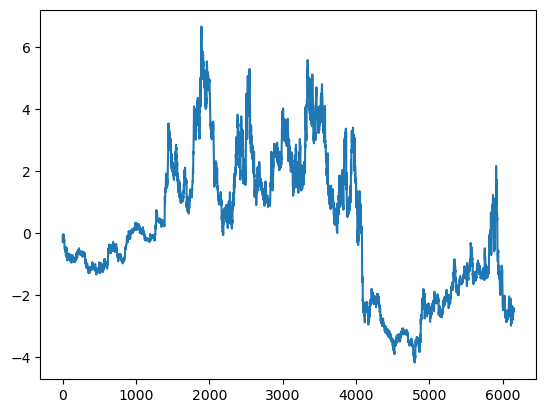

In [80]:
plt.plot(np.arange(0,len(energy_resid_dict['EGY'])),energy_resid_dict['EGY'])

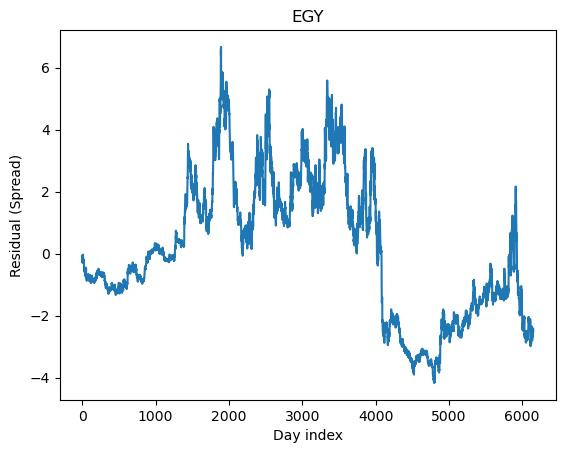

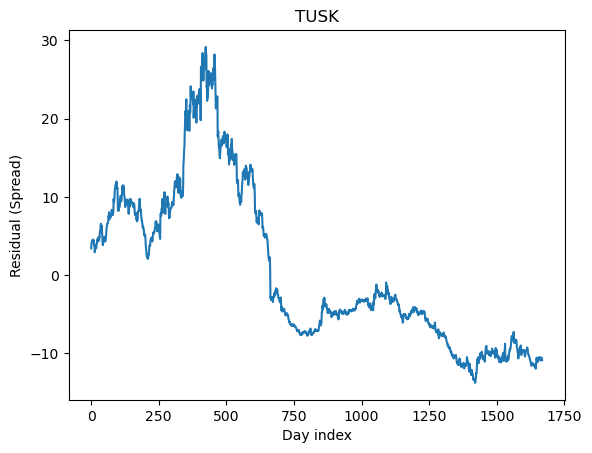

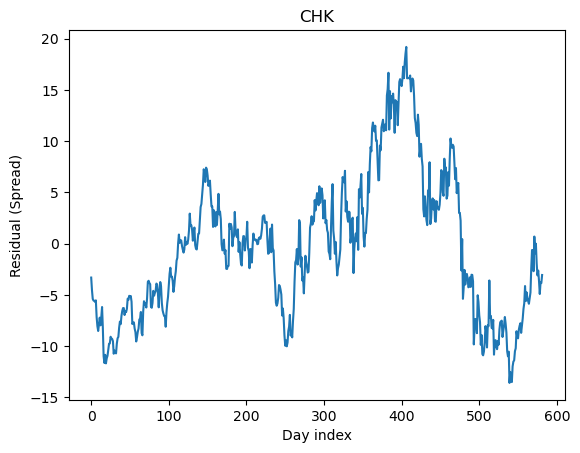

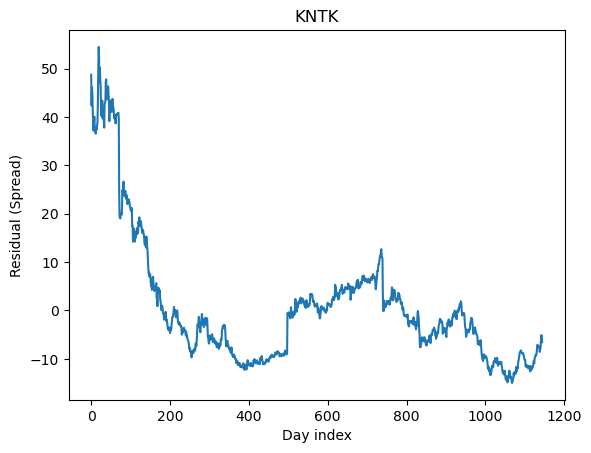

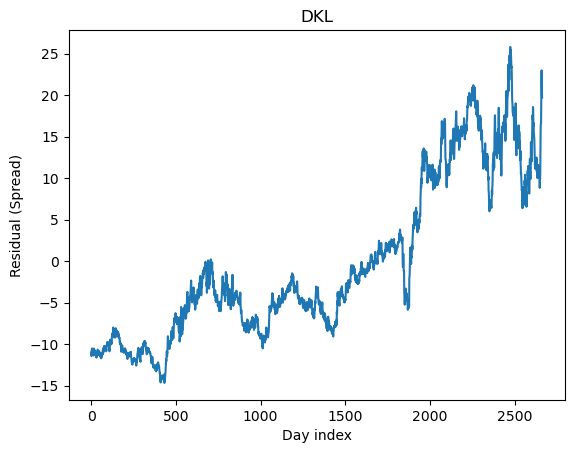

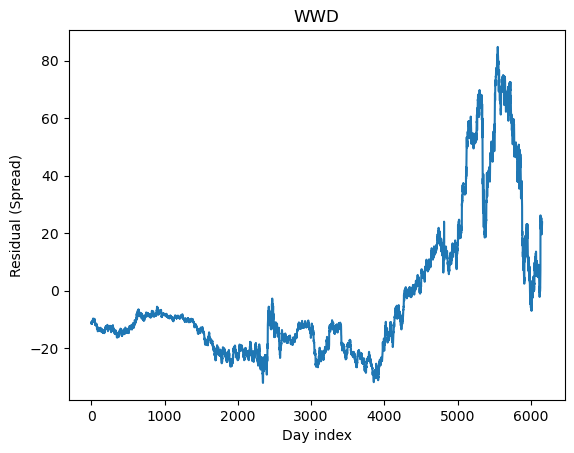

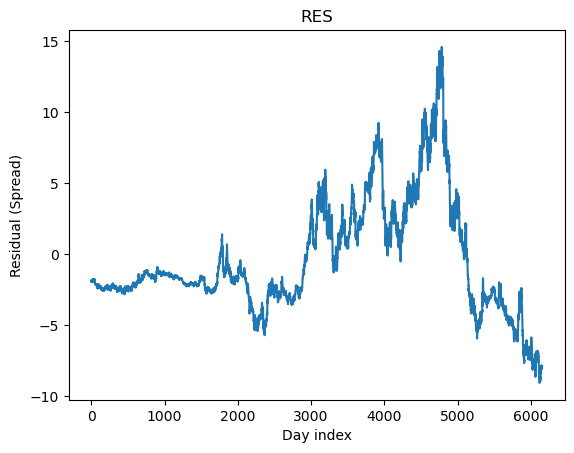

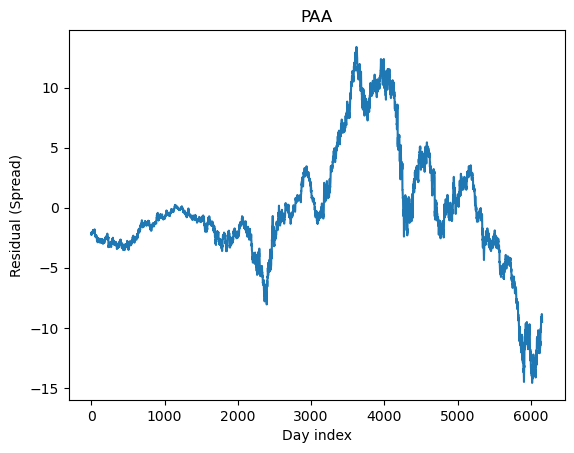

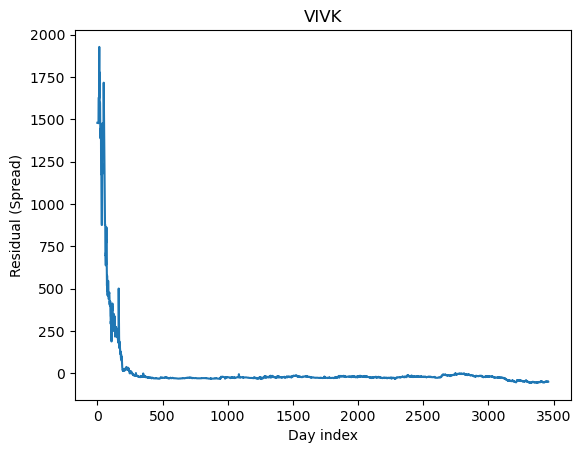

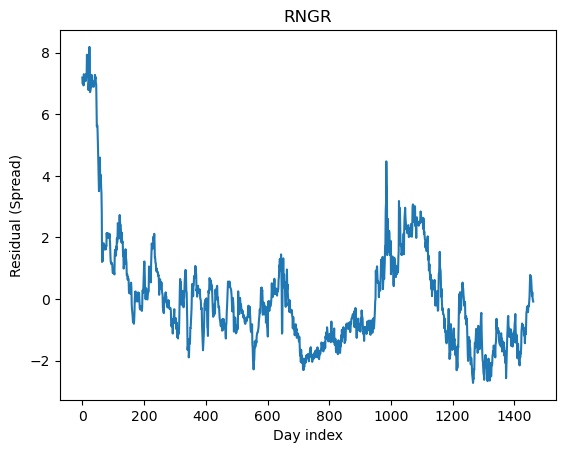

In [81]:
for s in energy_equities:
    r = energy_resid_dict[s]
    plt.figure()
    plt.plot(np.arange(0,len(r)),r)
    plt.xlabel('Day index')
    plt.ylabel('Residual (Spread)')
    plt.title(s)

In [82]:
from statsmodels.tsa.stattools import adfuller
for s in energy_equities:
    r = energy_resid_dict[s]
    pval = adfuller(r)[1]
    if pval < 0.05:
        print(s, pval, sep=', ')

KNTK, 0.00016099932143847457
VIVK, 1.2972685945601873e-19
RNGR, 0.0013340384853490282


This is implying that, of the energy equities we sampled, only KNTK, VIVK, and RNGR have stationary spreads

In [83]:
import math
vivk_resids = energy_resid_dict['VIVK']
insample_num = math.floor(0.75 * len(vivk_resids))
insample = vivk_resids[:insample_num]
outsample = vivk_resids[insample_num:]

In [84]:
mean = pd.Series(insample).describe()['mean']
sd = pd.Series(insample).describe()['std']

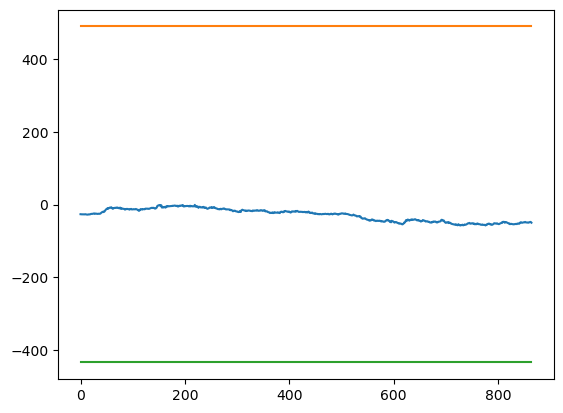

In [85]:
ub = mean + 2*sd
lb = mean - 2*sd

plt.plot(np.arange(0,len(outsample)),outsample,label='spread')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * ub,label='ub')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * lb ,label='lb')

In [90]:
kntk_resids = energy_resid_dict['KNTK']
insample_num = math.floor(0.75 * len(kntk_resids))
insample = kntk_resids[:insample_num]
outsample = kntk_resids[insample_num:]

In [91]:
mean = pd.Series(insample).describe()['mean']
sd = pd.Series(insample).describe()['std']

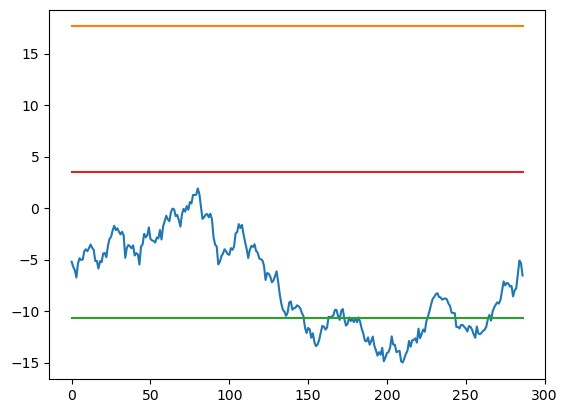

In [95]:
ub = mean + sd
lb = mean - sd

plt.plot(np.arange(0,len(outsample)),outsample,label='spread')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * ub,label='ub')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * lb ,label='lb')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * mean ,label='mean')

In [96]:
rngr_resids = energy_resid_dict['RNGR']
insample_num = math.floor(0.75 * len(rngr_resids))
insample = rngr_resids[:insample_num]
outsample = rngr_resids[insample_num:]

In [97]:
mean = pd.Series(insample).describe()['mean']
sd = pd.Series(insample).describe()['std']
ub = mean + sd
lb = mean - sd

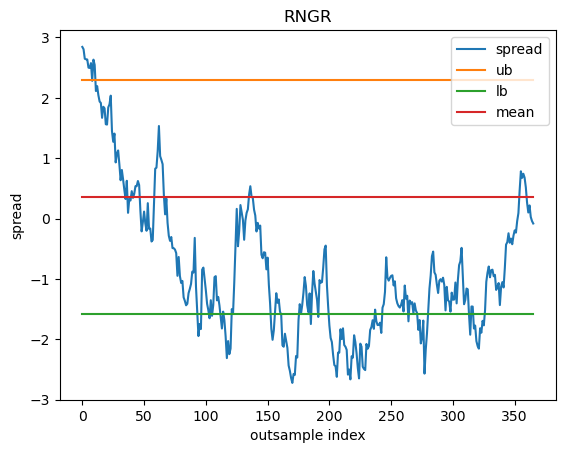

In [100]:
plt.plot(np.arange(0,len(outsample)),outsample,label='spread')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * ub,label='ub')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * lb ,label='lb')
plt.plot(np.arange(0,len(outsample)),np.ones(len(outsample)) * mean ,label='mean')
plt.xlabel('outsample index')
plt.ylabel('spread')
plt.title('RNGR')
plt.legend()

In [99]:
energy_beta_dict['RNGR']

0.14497468274804445

In [103]:
short = False
long_ = False
open_pos_idx = 0
prof = 0
num_trades = 0

for t in range(len(outsample)):
    cur_spread = outsample[t]
    if short:
        #open position: sold spread
        #need to buy to close
        if cur_spread < mean + 0.5 * sd:
            #close pos by buying spread
            prof += outsample[open_pos_idx] - cur_spread
            short = False
            num_trades+=1
            continue
        elif t - open_pos_idx > 20: #position open longer than 20 days
            num_trades += 1
            prof += outsample[open_pos_idx] - cur_spread
            short = False
            continue
        continue
    elif long_:
        #open position: bought spread
        #need to sell to closee
        if cur_spread > mean + 0.5 * sd:
            prof += cur_spread - outsample[open_pos_idx]
            long_ = False
            num_trades += 1
            continue
        elif t - open_pos_idx > 20: #position open longer than 20 days
            num_trades+=1
            prof += cur_spread - outsample[open_pos_idx]
            long_ = False
            continue
        continue
    
    if cur_spread < lb:
        open_pos_idx = t
        long_ = True
    elif cur_spread > ub:
        open_pos_idx = t
        short = True
    

In [104]:
prof

6.2161586045175135

In [105]:
num_trades

9